### DATA PREP 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter
import warnings
warnings. filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (9,6)
from utility import set_global_determinism
set_global_determinism()

In [2]:
date_df = pd.read_csv('muringato-sensor6.csv')
df = pd.read_csv('original_set_raw+water.csv')
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [3]:
df_normalized = normalize(df)
dataset= df_normalized[df_normalized.columns[0:10]].to_numpy()

In [13]:
from utility import window_stage
sample_step = 4
x, y = window_stage(dataset, sample_step)
print(x.shape, y.shape)
# for i in range(len(x)):
#     print(x[i], y[i])

(290, 4, 9) (290,)


In [14]:
x.shape[1]*x.shape[2]

36

In [15]:
# length of each input vector = the number of time steps (samples ) * by the number of features or time series(stations). 
# 2 * 8 = 9
X = x.reshape((x.shape[0], (x.shape[1]*x.shape[2])))
X.shape

(290, 36)

In [16]:
# train and test
data_size = int(X.shape[0] * .8)
x_train, y_train = X[:data_size], y[:data_size] 
x_test, y_test = X[data_size:], y[data_size:]
y_test = y_test.flatten()
x_train.shape

(232, 36)

### MLP 

In [17]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
model = MLPRegressor(hidden_layer_sizes=(200,20,5),random_state = 0, max_iter = 2000).fit(x_train, y_train)

In [18]:
y_pred = model.predict(x_test)

In [19]:
from sklearn.metrics import mean_squared_error
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
# Change the window size and observe the change in RSME

RMSE:  0.05534573117502305


In [20]:
#dates = df.time[:y_test.shape[0]]
df3 = date_df.tail(y_test.shape[0])
df4 = df3.drop(['Data'], axis = 1)
df4['y_test'] = y_test.tolist()
df4['y_pred'] = y_pred.tolist()
df4[['time']] = df4[['time']].apply(pd.to_datetime,dayfirst=True)

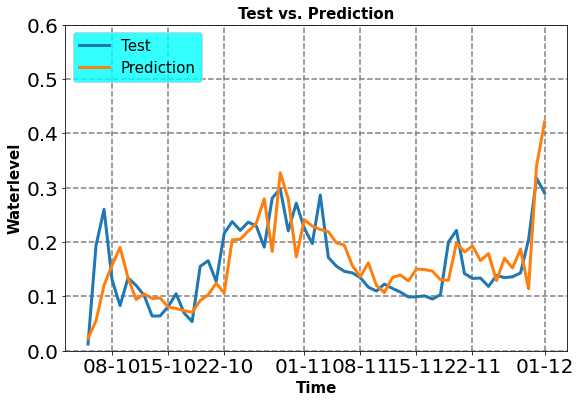

In [21]:
#Plot the output
fig, ax = plt.subplots(1,1)
fig.patch.set_facecolor('white')
Test, = plt.plot(df4['time'],y_test,linewidth=3, label='label1')
Prediction, = plt.plot(df4['time'], y_pred, linewidth=3, label='label1')
ax.grid(color = 'gray', linestyle = '--', linewidth = 1.5)
ax.set_title('Test vs. Prediction',fontsize=15,weight = 'bold')
ax.set_xlabel('Time',fontsize=15,weight = 'bold')
ax.set_ylabel('Waterlevel',fontsize=15, weight = 'bold')
ax.set_ylim(0,0.6)
ax.tick_params(axis='both',labelsize=20)
ax.tick_params(axis = 'x', labelsize = 20)
ax.grid(True)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.legend(["Test", "Prediction"], loc ="upper left", fancybox=True,facecolor='#01FFFF',prop={'size': 15,  'style': 'normal'})
ax.set(facecolor = "white")
plt.savefig('rain+water_water.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()